In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import zipfile

# Import models pre-trained

In [3]:
model = tf.keras.applications.ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 1s 0us/step


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Udemy/TensorFlow/Transfer-Learning-Data.zip'
zip_obj = zipfile.ZipFile(path, 'r')
zip_obj.extractall()
zip_obj.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/Udemy/TensorFlow/Transfer-Learning-Data.zip' mode='r'>>

In [9]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/bicycle.png', target_size=(224,224))

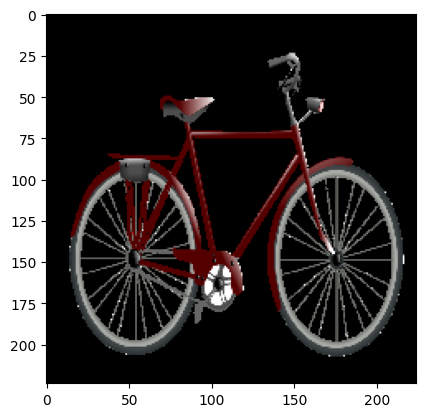

In [11]:
plt.imshow(sample_image)

In [12]:
type(sample_image)

PIL.Image.Image

In [13]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)

In [14]:
type(sample_image)

numpy.ndarray

In [15]:
np.shape(sample_image)

(224, 224, 3)

In [16]:
sample_image = np.expand_dims(sample_image, axis=0)

In [17]:
sample_image.shape

(1, 224, 224, 3)

In [19]:
sample_image.max()

255.0

In [22]:
sample_image.min()

0.0

In [23]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [24]:
sample_image.max()

151.061

In [25]:
sample_image.min()

-123.68

In [26]:
predictions = model.predict(sample_image)

1/1 [==============================] - 2s 2s/step


In [27]:
print('Predictions: ', tf.keras.applications.resnet50.decode_predictions(predictions, top=5))

35363/35363 [==============================] - 0s 0us/step
Predictions:  [[('n02835271', 'bicycle-built-for-two', 0.6329615), ('n03792782', 'mountain_bike', 0.053755797), ('n04482393', 'tricycle', 0.049757916), ('n03599486', 'jinrikisha', 0.015690282), ('n04507155', 'umbrella', 0.010513392)]]


# Transfer Learning

In [28]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [30]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [38]:
x = base_model.output

In [39]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [40]:
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(2, activation='softmax')(x)

In [41]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=preds)

In [42]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [43]:
for i, layer in enumerate(model.layers):
  print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [44]:
for layer in model.layers[:175]:
  layer.trainable = False

In [45]:
for layer in model.layers[175:]:
  layer.trainable = True

In [46]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

In [47]:
train_generator = train_datagen.flow_from_directory(r'/content/Transfer Learning Data/train', target_size=(224,224), batch_size=32, class_mode='categorical',
                                                    color_mode='rgb', shuffle = True)

Found 202 images belonging to 2 classes.


In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
history = model.fit(train_generator, epochs=10)

Epoch 1/10
7/7 [==============================] - 45s 7s/step - loss: 2.3217e-05 - accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 53s 8s/step - loss: 6.1436e-06 - accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 52s 7s/step - loss: 3.9739e-06 - accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 42s 6s/step - loss: 2.9040e-06 - accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 50s 7s/step - loss: 2.2939e-06 - accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 43s 6s/step - loss: 1.9126e-06 - accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 43s 6s/step - loss: 1.6347e-06 - accuracy: 1.0000
Epoch 8/10
7/7 [==============================] - 40s 6s/step - loss: 1.4181e-06 - accuracy: 1.0000
Epoch 9/10
7/7 [==============================] - 42s 6s/step - loss: 1.2470e-06 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 44s 7s/step - loss: 1.1047e-06 - accuracy: 1.0000

# Model Assessment

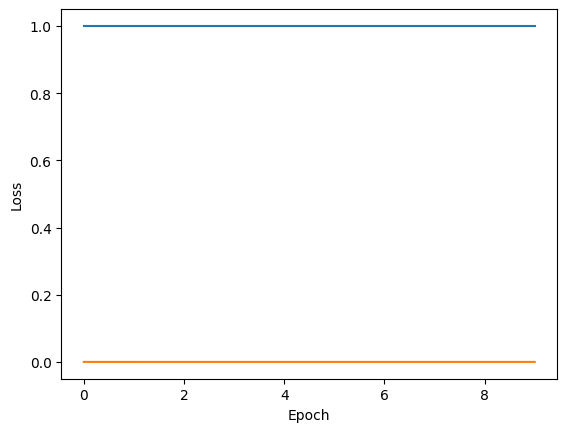

In [58]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()

plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()


In [52]:
sample_image = tf.keras.preprocessing.image.load_img(r'/content/Transfer Learning Data/cat.282.jpg', target_size=(224,224))

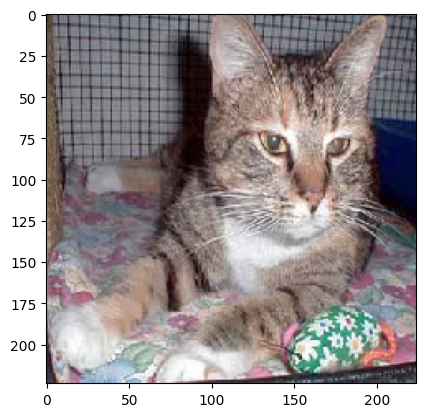

In [53]:
plt.imshow(sample_image)

In [54]:
sample_image = tf.keras.preprocessing.image.img_to_array(sample_image)
np.shape(sample_image)

In [55]:
sample_image = np.expand_dims(sample_image, axis=0)
sample_image.shape

In [56]:
sample_image = tf.keras.applications.resnet50.preprocess_input(sample_image)

In [57]:
predictions = model.predict(sample_image)
print(predictions)

1/1 [==============================] - 1s 1s/step
[[1.000000e+00 6.131401e-11]]
